In [1]:
import numpy as np, matplotlib.pyplot as plt, pandas as pd
pd.set_option('display.max_rows', 8)
!date

import methods

%load_ext autoreload
%autoreload 2

Mon May 17 12:23:58 PDT 2021


# Calculations for results section

## Load data files

In [2]:
data = methods.load_data()

/homes/abie/.conda/envs/limetr_conda/lib/python3.7/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


> We strongly recommend including all positive tests as a sensitivity analysis not just those required by work. I agree that differential testing may introduce a bias, but it would be better to show all the data so that we can consider the potential magnitude of that bias. There may actually be an even greater differential between HCW and other workers.  In fact, probably most non-health care workers don't get tested through employer requirements, and only know that they have COVID after becoming sick.

There are two natural approaches to this, and I don't want to include either in the main text, but I will check what the results are and include them in the response to reviewers.

Approach 1 is to include everyone who was tested, regardless of whether the test was required:

In [3]:
rows = (data['df'].date >= data['start_date']) & (data['df'].date <= data['end_date']
                                                 ) & (data['df'].test_last_14_days == 1)
sum(rows)

156127

In [4]:
df = methods.subset_data(data, rows, exposure='hcw', outcome='test_positive')

In [5]:
print(f'The survey data contained {len(df):,.0f} respondents who were tested (regardless of workplace requirements) '
      f'in the time period we focused on,'
      f' {df.exposure.sum():,.0f} HCWs and {(1-df.exposure).sum():,.0f} non-HCWs.'
      f' There were '
      f'{df.outcome.sum():,.0f} respondents who reported a positive test for COVID-19 in the last 14 days '
      f'({df[df.exposure==1].outcome.sum():,.0f} among HCWs and {df[df.exposure==0].outcome.sum():,.0f} among non-HCWs).')

The survey data contained 156,127 respondents who were tested (regardless of workplace requirements) in the time period we focused on, 22,594 HCWs and 133,533 non-HCWs. There were 13,637 respondents who reported a positive test for COVID-19 in the last 14 days (1,674 among HCWs and 11,963 among non-HCWs).


In [6]:
%%time

# set random seed for reproducibility
np.random.seed(12345)
rr_draws = methods.sample_rr_draws(df)
rr_mean, rr_lb, rr_ub = methods.my_summarize(rr_draws)

CPU times: user 4min 55s, sys: 28.2 s, total: 5min 23s
Wall time: 5min 23s


In [7]:
print(f'Among HCWs tested (regardless of whether the test was required), {df[df.exposure==1].outcome.sum():,.0f} of {df.exposure.sum():,.0f}'
      f' ({df[df.exposure==1].outcome.mean()*100:,.1f}%) reported a positive test in the last 14 days,'
      f' while among non-HCWs tested (regardless of whether the test was required), '
      f'{df[df.exposure==0].outcome.sum():,.0f} of {(df.exposure==0).sum():,.0f}'
      f' ({df[df.exposure==0].outcome.mean()*100:,.2f}%) reported a positive test,'
      f' for a relative COVID-19 prevalence ratio of {rr_mean:.1f} (95% UI {rr_lb:.2f} to {rr_ub:.2f}).'
      )

Among HCWs tested (regardless of whether the test was required), 1,674 of 22,594 (7.4%) reported a positive test in the last 14 days, while among non-HCWs tested (regardless of whether the test was required), 11,963 of 133,533 (8.96%) reported a positive test, for a relative COVID-19 prevalence ratio of 0.8 (95% UI 0.78 to 0.83).


In [8]:
# table version of results
t = pd.DataFrame(index=[0])
t.loc[0, 'HCW - tested'] = f'{df.exposure.sum():,.0f}'
t.loc[0, 'HCW - positive'] = f'{df[df.exposure==1].outcome.sum():,.0f}'
t.loc[0, 'HCW - (%)'] = f'{df[df.exposure==1].outcome.mean()*100:,.1f}'

t.loc[0, 'non-HCW - tested'] = f'{(1-df.exposure).sum():,.0f}'
t.loc[0, 'non-HCW - positive'] = f'{df[df.exposure==0].outcome.sum():,.0f}'
t.loc[0, 'non-HCW - (%)'] = f'{df[df.exposure==0].outcome.mean()*100:,.1f}'

t.loc[0, 'RR'] = f'{rr_mean:.2f}'
t.loc[0, '95% UI'] = f'{rr_lb:.2f} to {rr_ub:.2f}'

t

,HCW - tested,HCW - positive,HCW - (%),non-HCW - tested,non-HCW - positive,non-HCW - (%),RR,95% UI
0,"22,594","1,674",7.4,"133,533","11,963",9.0,0.79,0.78 to 0.83


## Approach 2 is to include everyone (tested and not tested)

This highlights the differential access to testing among HCWs.

In [9]:
rows = (data['df'].date >= data['start_date']) & (data['df'].date <= data['end_date'])
sum(rows)

1822662

In [10]:
df = methods.subset_data(data, rows, exposure='hcw', outcome='test_positive')

In [11]:
print(f'The survey data contained {len(df):,.0f} respondents (including both tested and untested)  '
      f'in the time period we focused on,'
      f' {df.exposure.sum():,.0f} HCWs and {(1-df.exposure).sum():,.0f} non-HCWs.'
      f' There were '
      f'{df.outcome.sum():,.0f} respondents who reported a positive test for COVID-19 in the last 14 days '
      f'({df[df.exposure==1].outcome.sum():,.0f} among HCWs and {df[df.exposure==0].outcome.sum():,.0f} among non-HCWs).')

The survey data contained 1,822,662 respondents (including both tested and untested)  in the time period we focused on, 123,448 HCWs and 1,699,214 non-HCWs. There were 13,637 respondents who reported a positive test for COVID-19 in the last 14 days (1,674 among HCWs and 11,963 among non-HCWs).


In [12]:
%%time

random_rows = (np.random.uniform(size=len(df)) <= 100_000/len(df))
rr_draws = methods.sample_rr_draws(df[random_rows])
rr_mean, rr_lb, rr_ub = methods.my_summarize(rr_draws)

CPU times: user 2min 44s, sys: 928 ms, total: 2min 45s
Wall time: 2min 45s


In [13]:
print(f'Among HCWs (tested and untested), {df[df.exposure==1].outcome.sum():,.0f} of {df.exposure.sum():,.0f}'
      f' ({df[df.exposure==1].outcome.mean()*100:,.1f}%) reported a positive test in the last 14 days,'
      f' while among non-HCWs (tested and untested), '
      f'{df[df.exposure==0].outcome.sum():,.0f} of {(df.exposure==0).sum():,.0f}'
      f' ({df[df.exposure==0].outcome.mean()*100:,.2f}%) reported a positive test,'
      f' for a relative COVID-19 prevalence ratio of {rr_mean:.1f} (95% UI {rr_lb:.2f} to {rr_ub:.2f}).'
      )

Among HCWs (tested and untested), 1,674 of 123,448 (1.4%) reported a positive test in the last 14 days, while among non-HCWs (tested and untested), 11,963 of 1,699,214 (0.70%) reported a positive test, for a relative COVID-19 prevalence ratio of 1.8 (95% UI 1.52 to 2.03).


> Additionally, we strongly recommend having a different reference population than all non-healthcare workers. Other high risk workers are included in the current reference group, which may have the impact of making the risk among healthcare workers appear lower. Potentially consider including major census or SOC occupations for comparison. 

We prefer to focus our discussion on a comparison of HCWs with all non-HCWs, but the reviewer raises an interesting additional question.  Although we choose to leave a full investigation of these occupational comparisons for future work, we cannot resist examining them briefly in this response.

In [14]:
data['df'][data['df'].test_required].Q64.value_counts(dropna=False).head(8)

NaN     51652
4.0     40644
5.0     24919
16.0    20801
2.0     15363
11.0     9101
7.0      7920
1.0      6432
Name: Q64, dtype: int64

Besides HCWs, the occupation with the highest rate of required testing are (16) Other occupation, (2) education,training, and library, and (11) office and administration services (7) is food prep and serving.

In [15]:
rows = (data['df'].date >= data['start_date']) & (data['df'].date <= data['end_date']
                                                 ) & (data['df'].test_required == 1)
rows &= (data['df'].Q64.isin([4,5,2,7]))
sum(rows)

19954

In [16]:
df = methods.subset_data(data, rows, exposure='hcw', outcome='test_positive')
len(df)

19954

In [17]:
%%time

rr_draws = methods.sample_rr_draws(df)
rr_mean, rr_lb, rr_ub = methods.my_summarize(rr_draws)

CPU times: user 25.7 s, sys: 16 ms, total: 25.7 s
Wall time: 25.7 s


In [18]:
print(f'A comparison of HCWs to workers in education and food services found'
      f' a relative COVID-19 incidence ratio of {rr_mean:.2f} '
      f'(95% UI {rr_lb:.2f} to {rr_ub:.2f}).'
      )

A comparison of HCWs to workers in education and food services found a relative COVID-19 incidence ratio of 0.97 (95% UI 0.82 to 1.12).


In [19]:
rows = (data['df'].date >= data['start_date']) & (data['df'].date <= data['end_date']
                                                 ) & (data['df'].test_required == 1)
rows &= (data['df'].Q64.isin([4,5,16]))
sum(rows)

19195

In [20]:
%%time

rr_draws = methods.sample_rr_draws(df)
rr_mean, rr_lb, rr_ub = methods.my_summarize(rr_draws)

CPU times: user 26.4 s, sys: 316 ms, total: 26.7 s
Wall time: 26.7 s


In [21]:
print(f'A comparison of HCWs to workers in occupation "Other" found'
      f' a relative COVID-19 incidence ratio of {rr_mean:.2f} '
      f'(95% UI {rr_lb:.2f} to {rr_ub:.2f}).'
      )

A comparison of HCWs to workers in occupation "Other" found a relative COVID-19 incidence ratio of 0.97 (95% UI 0.82 to 1.11).


I bet there are also a lot of students in the group with required tests who said they do not have an occupation.

In [22]:
rows = (data['df'].date >= data['start_date']) & (data['df'].date <= data['end_date']
                                                 ) & (data['df'].test_required == 1)
rows &= (data['df'].Q64.isin([4,5]) | data['df'].Q64.isnull())
sum(rows)

24312

In [23]:
data['df'][rows].Q64.isnull().sum()

9652

In [24]:
df = methods.subset_data(data, rows, exposure='hcw', outcome='test_positive')

In [25]:
np.round(
    data['df'][rows].groupby('Q64', dropna=False
                            ).age_group.value_counts(normalize=True).unstack()
 * 100, 1)

age_group,1.0,2.0,3.0,4.0,5.0,6.0,7.0
Q64,,,,,,,
4.0,4.3,17.7,23.1,25.2,22.5,6.5,0.7
5.0,8.1,16.8,20.6,23.1,23.5,6.9,1.0
NaN,22.8,18.3,17.4,17.1,13.9,6.5,4.0


In [26]:
data['df'].D9.value_counts(dropna=False)

1.0    3149426
2.0    2532747
NaN    1319483
Name: D9, dtype: int64

In [27]:
data['df'][data['df'].Q64.isnull()].D9.value_counts(dropna=False, normalize=True)

2.0    0.649789
NaN    0.338520
1.0    0.011691
Name: D9, dtype: float64

This also identifies an important divergence between the “non-HCW” population and the worker population---there are XXX respondents without an occupation code included in the non-HCW population.  Repeating our analysis with these respondents excluded finds :

In [28]:
rows = (data['df'].date >= data['start_date']) & (data['df'].date <= data['end_date']
                                                 ) & (data['df'].test_required == 1)
rows &= (~data['df'].Q64.isnull())
sum(rows)

33778

In [29]:
rr_draws = methods.sample_rr_draws(df)
rr_mean, rr_lb, rr_ub = methods.my_summarize(rr_draws)

In [30]:
print(f'A comparison of HCWs to respondents who were tested and reported a non-HCW occupation found'
      f' a relative COVID-19 incidence ratio of {rr_mean:.2f} '
      f'(95% UI {rr_lb:.2f} to {rr_ub:.2f}).'
      )

A comparison of HCWs to respondents who were tested and reported a non-HCW occupation found a relative COVID-19 incidence ratio of 0.60 (95% UI 0.55 to 0.67).


In [31]:
# what about when restricted to only those who worked in last 14 days?

rows = (data['df'].date >= data['start_date']) & (data['df'].date <= data['end_date']
                                                 ) & (data['df'].test_required == 1)
rows &= (data['df'].D9 == 1)
sum(rows)

34167

In [32]:
df = methods.subset_data(data, rows, exposure='hcw', outcome='test_positive')

In [33]:
rr_draws = methods.sample_rr_draws(df)
rr_mean, rr_lb, rr_ub = methods.my_summarize(rr_draws)

In [34]:
print(f'A comparison of HCWs to respondents who worked in last 14 days found'
      f' a relative COVID-19 incidence ratio of {rr_mean:.2f} '
      f'(95% UI {rr_lb:.2f} to {rr_ub:.2f}).'
      )

A comparison of HCWs to respondents who worked in last 14 days found a relative COVID-19 incidence ratio of 0.84 (95% UI 0.76 to 0.91).


> The demographics for healthcare workers should be compared to national data about healthcare workers demographics. This data can be obtained from the CPS or census. CPS is linked here: https://www.bls.gov/cps/tables.htm

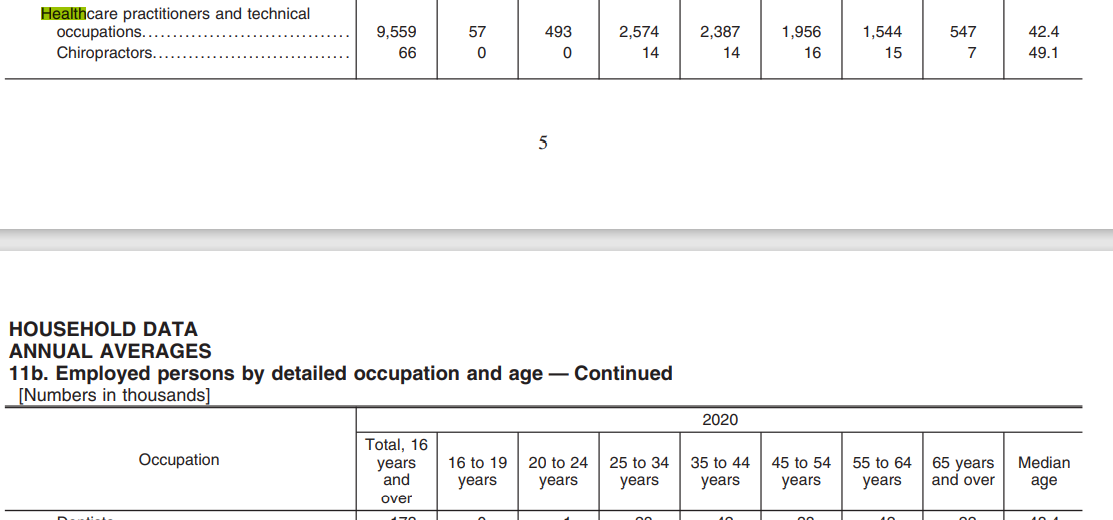

In [35]:
df = methods.subset_data(data, rows, exposure='hcw', outcome='test_positive')

In [36]:
# what about when restricted to only those who worked?

rows = (data['df'].date >= data['start_date']) & (data['df'].date <= data['end_date']
                                                 ) & (data['df'].test_required == 1)
sum(rows)

43430

In [37]:
data['df'][rows].age_group.value_counts(dropna=False).sort_index().reset_index()

,index,age_group
0,1.0,4413
1,2.0,7538
2,3.0,8401
3,4.0,8766
4,5.0,7572
5,6.0,2283
6,7.0,624
7,NaN,3833


In [38]:
rows = (data['df'].date >= data['start_date']) & (data['df'].date <= data['end_date']
     ) & (data['df'].test_required == 1) & (data['df']['Q68'] == 1)  # Physician or surgeon

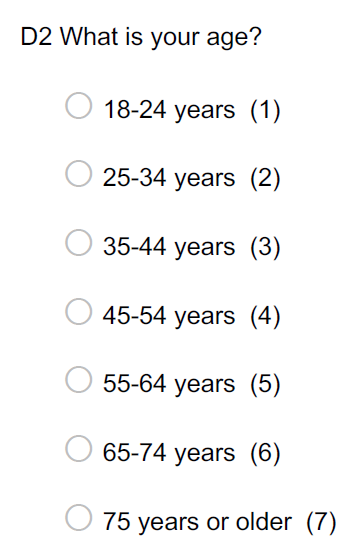

In [39]:
rows = (data['df'].date >= data['start_date']) & (data['df'].date <= data['end_date']
     ) & (data['df'].test_required == 1) & (
    data['df'].Q68 == 1)  # Physician or surgeon

def my_age_pattern(rows):
    t = data['df'][rows].age_group.value_counts(dropna=False)
    t = t.sort_index().reset_index()
    t['pct'] = t.age_group / t.age_group.sum() *100
    return np.round(t, 1).sort_index()
my_age_pattern(rows)

,index,age_group,pct
0,1.0,6,2.1
1,2.0,44,15.1
2,3.0,65,22.3
3,4.0,71,24.4
4,5.0,61,21.0
5,6.0,22,7.6
6,7.0,22,7.6


In [40]:
sum(rows)

291

In [41]:
rows = (data['df'].date >= data['start_date']) & (data['df'].date <= data['end_date']
     ) & (data['df'].test_required == 1) & (
    data['df'].Q68 == 2)  # Registered nurse (including nurse practitioner)

my_age_pattern(rows)

,index,age_group,pct
0,1.0,71,2.2
1,2.0,466,14.7
2,3.0,757,23.9
3,4.0,807,25.5
4,5.0,776,24.5
5,6.0,272,8.6
6,7.0,17,0.5
7,NaN,2,0.1


In [42]:
sum(rows)

3168